In [3]:
import os, time, sys
import csv
import math, random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage import io, color, exposure, transform

from importlib import reload

datasets_dir = './datasets-fidle'


df = pd.read_csv(f'{datasets_dir}/GTSRB/origine/Test.csv', header=0)
display(df.head(10))

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [45]:
def  read_csv_dataset(csv_file): 
    '''
    Reads traffic sign data from German Traffic Sign Recognition Benchmark dataset.
    Arguments:  
        csv filename :  Description file, Example /data/GTSRB/Train.csv
    Returns:
        x,y          :  np array of images, np array of corresponding labels
    '''

    path = os.path.dirname(csv_file)
    name = os.path.basename(csv_file)

    # ---- Read csv file
    #
    df = pd.read_csv(csv_file, header=0)
    
    # ---- Get filenames and ClassIds
    #
    filenames = df['Path'].to_list()
    y         = df['ClassId'].to_list()
    x         = []
    
    # ---- Read images
    #
    
    #for i in range(0,43):
     #   for j in range(0,60):
      #        #try:
       #         image=io.imread(f'./datasets-fidle/GTSRB/origine/Train/{i}/0000{i}_00000_000{j:02d}.png')
        #        x.append(image)
              #@except:
               # print('error:',e)     
    for filename in filenames:
        try:
           image=io.imread(f'{path}/{filename}')
           x.append(image)
        except:
           continue
        
    return np.array(x,dtype=object),np.array(y)

In [46]:
(x_train,y_train) = read_csv_dataset(f'{datasets_dir}/GTSRB/origine/Train.csv')



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [54]:
(x_test ,y_test)  = read_csv_dataset(f'{datasets_dir}/GTSRB/origine/Test.csv')

[array([[[115, 138, 173],
         [116, 138, 172],
         [116, 137, 169],
         ...,
         [ 86, 110, 135],
         [ 80, 101, 126],
         [ 63,  82, 105]],

        [[118, 143, 178],
         [116, 140, 177],
         [115, 138, 174],
         ...,
         [120, 142, 171],
         [119, 139, 167],
         [117, 136, 166]],

        [[116, 143, 177],
         [113, 139, 174],
         [115, 140, 174],
         ...,
         [120, 141, 173],
         [119, 139, 169],
         [120, 139, 171]],

        ...,

        [[116, 136, 167],
         [116, 136, 165],
         [114, 134, 168],
         ...,
         [117, 136, 165],
         [116, 138, 165],
         [114, 140, 168]],

        [[114, 135, 167],
         [114, 135, 165],
         [111, 133, 165],
         ...,
         [117, 137, 166],
         [115, 139, 168],
         [111, 140, 170]],

        [[112, 135, 168],
         [110, 134, 165],
         [110, 135, 165],
         ...,
         [118, 139, 168],
        

In [56]:
print(x_test[0])

[[[115 138 173]
  [116 138 172]
  [116 137 169]
  ...
  [ 86 110 135]
  [ 80 101 126]
  [ 63  82 105]]

 [[118 143 178]
  [116 140 177]
  [115 138 174]
  ...
  [120 142 171]
  [119 139 167]
  [117 136 166]]

 [[116 143 177]
  [113 139 174]
  [115 140 174]
  ...
  [120 141 173]
  [119 139 169]
  [120 139 171]]

 ...

 [[116 136 167]
  [116 136 165]
  [114 134 168]
  ...
  [117 136 165]
  [116 138 165]
  [114 140 168]]

 [[114 135 167]
  [114 135 165]
  [111 133 165]
  ...
  [117 137 166]
  [115 139 168]
  [111 140 170]]

 [[112 135 168]
  [110 134 165]
  [110 135 165]
  ...
  [118 139 168]
  [116 139 170]
  [115 140 172]]]


In [58]:
(x_meta ,y_meta)  = read_csv_dataset(f'{datasets_dir}/GTSRB/origine/Meta.csv')

In [63]:
train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

for image in x_train:
    (lx,ly,lz) = image.shape
    train_size.append(lx*ly/1024)
    train_ratio.append(lx/ly)
    train_lx.append(lx)
    train_ly.append(ly)

for image in x_test:
    (lx,ly,lz) = image.shape
    test_size.append(lx*ly/1024)
    test_ratio.append(lx/ly)
    test_lx.append(lx)
    test_ly.append(ly)

x_train shape :  (37204,)
y_train shape :  (39209,)
x_test  shape :  (12630,)
y_test  shape :  (12630,)


NameError: name 'fidle' is not defined

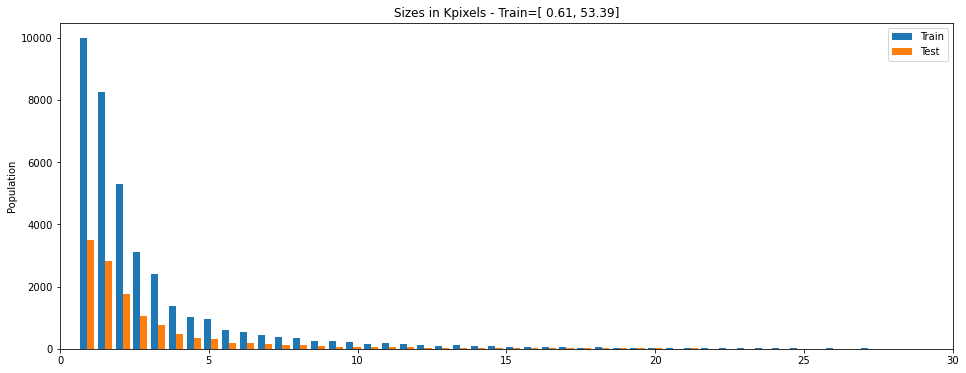

In [64]:
# ------ Global stuff
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test  shape : ",x_test.shape)
print("y_test  shape : ",y_test.shape)

# ------ Statistics / sizes
plt.figure(figsize=(16,6))
plt.hist([train_size,test_size], bins=100)
plt.gca().set(title='Sizes in Kpixels - Train=[{:5.2f}, {:5.2f}]'.format(min(train_size),max(train_size)), 
              ylabel='Population', xlim=[0,30])
plt.legend(['Train','Test'])
fidle.scrawler.save_fig('01-stats-sizes')
plt.show()

# ------ Statistics / ratio lx/ly
plt.figure(figsize=(16,6))
plt.hist([train_ratio,test_ratio], bins=100)
plt.gca().set(title='Ratio lx/ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ratio),max(train_ratio)), 
              ylabel='Population', xlim=[0.8,1.2])
plt.legend(['Train','Test'])
fidle.scrawler.save_fig('02-stats-ratios')
plt.show()

# ------ Statistics / lx
plt.figure(figsize=(16,6))
plt.hist([train_lx,test_lx], bins=100)
plt.gca().set(title='Images lx - Train=[{:5.2f}, {:5.2f}]'.format(min(train_lx),max(train_lx)), 
              ylabel='Population', xlim=[20,150])
plt.legend(['Train','Test'])
fidle.scrawler.save_fig('03-stats-lx')
plt.show()

# ------ Statistics / ly
plt.figure(figsize=(16,6))
plt.hist([train_ly,test_ly], bins=100)
plt.gca().set(title='Images ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ly),max(train_ly)), 
              ylabel='Population', xlim=[20,150])
plt.legend(['Train','Test'])
fidle.scrawler.save_fig('04-stats-ly')
plt.show()

# ------ Statistics / classId
plt.figure(figsize=(16,6))
plt.hist([y_train,y_test], bins=43)
plt.gca().set(title='ClassesId', ylabel='Population', xlim=[0,43])
plt.legend(['Train','Test'])
fidle.scrawler.save_fig('05-stats-classes')
plt.show()

In [66]:
def images_enhancement(images, width=25, height=25, mode='RGB'):
    '''
    Resize and convert images - doesn't change originals.
    input images must be RGBA or RGB.
    Note : all outputs are fixed size numpy array of float64
    args:
        images :         images list
        width,height :   new images size (25,25)
        mode :           RGB | RGB-HE | L | L-HE | L-LHE | L-CLAHE
    return:
        numpy array of enhanced images
    '''
    modes = { 'RGB':3, 'RGB-HE':3, 'L':1, 'L-HE':1, 'L-LHE':1, 'L-CLAHE':1}
    lz=modes[mode]
    
    out=[]
    for img in images:
        
        # ---- if RGBA, convert to RGB
        if img.shape[2]==4:
            img=color.rgba2rgb(img)
            
        # ---- Resize
        img = transform.resize(img, (width,height))

        # ---- RGB / Histogram Equalization
        if mode=='RGB-HE':
            hsv = color.rgb2hsv(img.reshape(width,height,3))
            hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
            img = color.hsv2rgb(hsv)
        
        # ---- Grayscale
        if mode=='L':
            img=color.rgb2gray(img)
            
        # ---- Grayscale / Histogram Equalization
        if mode=='L-HE':
            img=color.rgb2gray(img)
            img=exposure.equalize_hist(img)
            
        # ---- Grayscale / Local Histogram Equalization
        if mode=='L-LHE':        
            img=color.rgb2gray(img)
            img = img_as_ubyte(img)
            img=rank.equalize(img, disk(10))/255.
        
        # ---- Grayscale / Contrast Limited Adaptive Histogram Equalization (CLAHE)
        if mode=='L-CLAHE':
            img=color.rgb2gray(img)
            img=exposure.equalize_adapthist(img)
            
        # ---- Add image in list of list
        out.append(img)

    # ---- Reshape images
    #     (-1, width,height,1) for L
    #     (-1, width,height,3) for RGB
    #
    out = np.array(out,dtype='float64')
    out = out.reshape(-1,width,height,lz)
    return out

In [67]:
i=random.randint(0,len(x_train)-16)
x_samples = x_train[i:i+16]
y_samples = y_train[i:i+16]

datasets  = {}

datasets['RGB']      = images_enhancement( x_samples, width=25, height=25, mode='RGB'  )
datasets['RGB-HE']   = images_enhancement( x_samples, width=25, height=25, mode='RGB-HE'  )
datasets['L']        = images_enhancement( x_samples, width=25, height=25, mode='L'  )
datasets['L-HE']     = images_enhancement( x_samples, width=25, height=25, mode='L-HE'  )
datasets['L-LHE']    = images_enhancement( x_samples, width=25, height=25, mode='L-LHE'  )
datasets['L-CLAHE']  = images_enhancement( x_samples, width=25, height=25, mode='L-CLAHE'  )

x_expected=[ x_meta[i] for i in y_samples]




n=10
for k,d in datasets.items():
    print("dataset : {}  min,max=[{:.3f},{:.3f}]  shape={}".format(k,d.min(),d.max(), d.shape))

    n+=1


dataset : RGB  min,max=[0.052,1.000]  shape=(16, 25, 25, 3)
dataset : RGB-HE  min,max=[0.001,1.000]  shape=(16, 25, 25, 3)
dataset : L  min,max=[0.056,1.000]  shape=(16, 25, 25, 1)
dataset : L-HE  min,max=[0.002,1.000]  shape=(16, 25, 25, 1)
dataset : L-LHE  min,max=[0.004,1.000]  shape=(16, 25, 25, 1)
dataset : L-CLAHE  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


In [68]:
def save_h5_dataset(x_train, y_train, x_test, y_test, x_meta,y_meta, filename):
        
    # ---- Create h5 file
    with h5py.File(filename, "w") as f:
        f.create_dataset("x_train", data=x_train)
        f.create_dataset("y_train", data=y_train)
        f.create_dataset("x_test",  data=x_test)
        f.create_dataset("y_test",  data=y_test)
        f.create_dataset("x_meta",  data=x_meta)
        f.create_dataset("y_meta",  data=y_meta)
        
    # ---- done
    size=os.path.getsize(filename)/(1024*1024)
    print('Dataset : {:24s}  shape : {:22s} size : {:6.1f} Mo   (saved)'.format(filename, str(x_train.shape),size))

In [74]:

n_train = int( len(x_train)*0.6 )
n_test  = int( len(x_test)*0.6 )

print(f'Scale is : {0.6}')
print(f'x_train length is : {n_train}')
print(f'x_test  length is : {n_test}')
print(f'output dir is     : ./\n')


for s in [24, 48]:
    for m in ['RGB', 'RGB-HE', 'L', 'L-LHE']:
        # ---- A nice dataset name
        filename = f'./set-{s}x{s}-{m}.h5'
        
        # ---- Enhancement
        #      Note : x_train is a numpy array of python objects (images with <> sizes)
        #             but images_enhancement() return a real array of float64 numpy (images with same size)
        #             so, we can save it in nice h5 files
        #
        x_train_new = images_enhancement( x_train[:n_train], width=s, height=s, mode=m )
        x_test_new  = images_enhancement( x_test[:n_test],  width=s, height=s, mode=m )
        x_meta_new  = images_enhancement( x_meta,  width=s, height=s, mode='RGB' )
        
        # ---- Save
        save_h5_dataset( x_train_new, y_train[:n_train], x_test_new, y_test[:n_test], x_meta_new,y_meta, filename)

x_train_new,x_test_new=0,0



Scale is : 0.6
x_train length is : 22322
x_test  length is : 7578
output dir is     : ./

Dataset : ./set-24x24-RGB.h5        shape : (22322, 24, 24, 3)     size :  394.9 Mo   (saved)
Dataset : ./set-24x24-RGB-HE.h5     shape : (22322, 24, 24, 3)     size :  394.9 Mo   (saved)
Dataset : ./set-24x24-L.h5          shape : (22322, 24, 24, 1)     size :  132.1 Mo   (saved)
Dataset : ./set-24x24-L-LHE.h5      shape : (22322, 24, 24, 1)     size :  132.1 Mo   (saved)
Dataset : ./set-48x48-RGB.h5        shape : (22322, 48, 48, 3)     size : 1579.1 Mo   (saved)
Dataset : ./set-48x48-RGB-HE.h5     shape : (22322, 48, 48, 3)     size : 1579.1 Mo   (saved)
Dataset : ./set-48x48-L.h5          shape : (22322, 48, 48, 1)     size :  528.0 Mo   (saved)
Dataset : ./set-48x48-L-LHE.h5      shape : (22322, 48, 48, 1)     size :  528.0 Mo   (saved)


In [78]:
dataset='set-24x24-L'
samples=range(24)

with  h5py.File(f'./{dataset}.h5','r') as f:
    x_tmp = f['x_train'][:]
    y_tmp = f['y_train'][:]
    print(x_tmp[0])

[[[0.19736552]
  [0.19885446]
  [0.20774174]
  [0.25532254]
  [0.32629141]
  [0.25877297]
  [0.22061789]
  [0.2343872 ]
  [0.34366602]
  [0.24633747]
  [0.20698883]
  [0.19884959]
  [0.21423419]
  [0.20553016]
  [0.32527925]
  [0.24037283]
  [0.2187841 ]
  [0.20173437]
  [0.1910914 ]
  [0.18414354]
  [0.18477585]
  [0.1887041 ]
  [0.19614515]
  [0.19026579]]

 [[0.19775917]
  [0.19219738]
  [0.19791587]
  [0.20675281]
  [0.2060868 ]
  [0.196776  ]
  [0.20375154]
  [0.25362366]
  [0.29625578]
  [0.23493605]
  [0.21434146]
  [0.19971507]
  [0.19776358]
  [0.20165314]
  [0.30115567]
  [0.22106634]
  [0.22075037]
  [0.20955986]
  [0.19473575]
  [0.18686409]
  [0.18806895]
  [0.19444942]
  [0.22097858]
  [0.19645581]]

 [[0.19865134]
  [0.1900363 ]
  [0.19348697]
  [0.19498343]
  [0.19300286]
  [0.19243839]
  [0.19630675]
  [0.22452535]
  [0.27108259]
  [0.23548806]
  [0.22621119]
  [0.21398136]
  [0.20425513]
  [0.20357112]
  [0.20140567]
  [0.19788265]
  [0.20497742]
  [0.21053571]
  [0.1